In [2]:
import numpy as np
from pyprojroot.here import here
import pandas as pd
from pyarrow import feather
import janitor
from janitor import clean_names

groups = {
  "populacao": ["densidade_populacional", "populacao_residente"],
  "setor": [["setor_primario", "setor_secundario", "setor_terciario"], ["perc_prim", "perc_sec"]],
  "causas": ["classe_da_causa_6", "causa_do_incidente", "classe_da_causa_4"],
  "direcao do vento" : [["dd_med", "dd_ffx"], ["dd_med_sin", "dd_med_cos", "dd_ffx_sin", "dd_ffx_cos"]],

  # TODO falta aquilo da altitude e tal
}
variables_to_not_use = ["codigo_do_relatorio", "distrito", "perc_terc"]

# EventosFinalCompleto.feather
eventos_completo = feather.read_feather(here("data/EventosFinalCompleto.feather"))
# EventosApeans.feather
eventos = feather.read_feather(here("data/EventosApeans.feather"))
# DiariosApeans.feather
diarios = feather.read_feather(here("data/DiariosApeans.feather"))
eventos_completo

,codigo_do_relatorio,concelho,data_do_incidente,nivel_de_tensao,causa_do_incidente,duracao_incidente_min_,n_º_clientes_afetados,tiepi_mt_min_,saifi_mt_#_,saidi_mt_min_,...,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd,MaxHeight,MinHeight
0,EDPD_2018_JAN_T_1,ALMADA,2018-01-02,MT,Escavações,55,828,0.002935,0.000044,0.002456,...,10.70,17.40,2.600,278.25,289.50,2.0,7.800,0.000000,125.0,0.0
1,EDPD_2018_JAN_T_2,SERTA,2018-01-02,MT,Abate De Árvores,163,549,0.002933,0.000177,0.016501,...,10.60,13.80,6.200,249.00,270.00,2.8,8.100,0.000000,1084.0,125.0
2,EDPD_2018_JAN_T_3,FELGUEIRAS,2018-01-04,MT,Deslizamento De Terras,596,3459,0.019228,0.000266,0.035905,...,14.00,14.80,12.900,197.00,180.00,3.9,14.400,4.000000,575.0,145.0
3,EDPD_2018_JAN_T_4,TORRES VEDRAS,2018-01-05,BT,Veículos,178,102,0.000000,0.000000,0.000000,...,12.40,15.10,9.100,288.00,225.00,3.6,13.900,13.200000,394.0,0.0
4,EDPD_2018_JAN_T_5,NISA,2018-01-09,MT,Aves,119,1731,0.004422,0.000155,0.010038,...,4.90,7.80,2.200,137.00,118.00,4.1,15.400,15.900000,463.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,EDPD_2020_DEZ_T_21,POMBAL,2020-12-24,MT,Abate De Árvores,139,2517,0.005941,0.000461,0.017245,...,7.90,12.20,2.100,7.00,351.00,1.7,7.600,0.000000,560.0,0.0
2918,EDPD_2020_DEZ_T_22,VILA NOVA DE GAIA,2020-12-30,MT,Aves,81,3641,0.011914,0.000290,0.011131,...,4.45,9.05,0.275,239.00,186.25,1.5,4.825,0.787500,262.0,0.0
2919,EDPD_2020_DEZ_T_23,ALBUFEIRA,2020-12-28,MT,Escavações,81,3175,0.005974,0.000086,0.005940,...,13.20,15.30,7.700,285.00,293.00,5.8,14.100,0.100000,227.0,0.0
2920,EDPD_2020_DEZ_T_24,CASTRO MARIM,2020-12-28,MT,Veículos,239,591,0.006928,0.000054,0.011528,...,13.20,15.30,7.700,285.00,293.00,5.8,14.100,0.100000,276.0,0.0


In [3]:
diarios

,concelho,distrito,date,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,...,percentagem_zonaa,percentagem_zonab,percentagem_zonac,soma_degree_rede_concelho,n_subestacoes_concelho,perc_prim,perc_sec,perc_terc,minheight,maxheight
0,ALMADA,SETUBAL,2018-01-01,8.8,17.8,2.7,273.50,292.5,1.700,6.725,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
1,ALMADA,SETUBAL,2018-01-02,10.7,17.4,2.6,278.25,289.5,2.000,7.800,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
2,ALMADA,SETUBAL,2018-01-03,14.7,17.5,10.2,291.25,320.5,2.050,6.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
3,ALMADA,SETUBAL,2018-01-04,15.0,20.3,12.9,255.25,244.5,2.625,7.450,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
4,ALMADA,SETUBAL,2018-01-05,12.8,15.7,9.5,245.25,194.0,3.575,11.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560891,RESENDE,VISEU,2023-12-27,7.3,12.6,2.8,133.00,90.0,2.600,5.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560892,RESENDE,VISEU,2023-12-28,8.8,10.7,7.2,202.00,208.0,2.300,5.500,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560893,RESENDE,VISEU,2023-12-29,9.3,11.9,7.9,157.00,231.0,1.400,3.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560894,RESENDE,VISEU,2023-12-30,9.0,9.7,7.6,191.00,219.0,2.600,8.300,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0


In [4]:
eventos_completo.columns
"""
Index(['codigo_do_relatorio', 'concelho', 'data_do_incidente',
       'nivel_de_tensao', 'causa_do_incidente', 'duracao_incidente_min_',
       'n_º_clientes_afetados', 'tiepi_mt_min_', 'saifi_mt_#_',
       'saidi_mt_min_', 'end_mwh_', 'saifi_bt_#_', 'saidi_bt_min_', 'decisao',
       'distrito', 'densidade_populacional', 'populacao_residente',
       'setor_primario', 'setor_secundario', 'setor_terciario',
       'indice_de_envelhecimento', 'rural', 'count_zonaa', 'count_zonab',
       'count_zonac', 'total_concelho_zonas', 'percentagem_zonaa',
       'percentagem_zonab', 'percentagem_zonac', 'soma_degree_rede_concelho',
       'n_subestacoes_concelho', 'classe_da_causa_4', 'classe_da_causa_6',
       'perc_prim', 'perc_sec', 'perc_terc', 'sen_ano', 'cos_ano', 'sen_mes',
       'cos_mes', 't_med', 't_max', 't_min', 'dd_med', 'dd_ffx', 'ff_med',
       'ff_max', 'pr_qtd', 'MaxHeight', 'MinHeight'],
      dtype='object')
"""

"\nIndex(['codigo_do_relatorio', 'concelho', 'data_do_incidente',\n       'nivel_de_tensao', 'causa_do_incidente', 'duracao_incidente_min_',\n       'n_º_clientes_afetados', 'tiepi_mt_min_', 'saifi_mt_#_',\n       'saidi_mt_min_', 'end_mwh_', 'saifi_bt_#_', 'saidi_bt_min_', 'decisao',\n       'distrito', 'densidade_populacional', 'populacao_residente',\n       'setor_primario', 'setor_secundario', 'setor_terciario',\n       'indice_de_envelhecimento', 'rural', 'count_zonaa', 'count_zonab',\n       'count_zonac', 'total_concelho_zonas', 'percentagem_zonaa',\n       'percentagem_zonab', 'percentagem_zonac', 'soma_degree_rede_concelho',\n       'n_subestacoes_concelho', 'classe_da_causa_4', 'classe_da_causa_6',\n       'perc_prim', 'perc_sec', 'perc_terc', 'sen_ano', 'cos_ano', 'sen_mes',\n       'cos_mes', 't_med', 't_max', 't_min', 'dd_med', 'dd_ffx', 'ff_med',\n       'ff_max', 'pr_qtd', 'MaxHeight', 'MinHeight'],\n      dtype='object')\n"

In [14]:
# sin and cos is wrong 
# sen_ano, cos_ano, sen_mes, cos_mes
def eh_bissexto(ano):
  return ano % 4 == 0 and (ano % 100 != 0 or ano % 400 == 0)

def n_dias_mes(mes, ano):
  if mes == 2:
    return 29 if eh_bissexto(ano) else 28
  if mes in [4, 6, 9, 11]:
    return 30
  return 31

eventos_completo["sen_ano"] = eventos_completo.apply(lambda x: np.sin(2*np.pi*x.data_do_incidente.day_of_year/(366 if eh_bissexto(x.data_do_incidente.year) else 365)), axis=1)
eventos_completo["cos_ano"] = eventos_completo.apply(lambda x: np.cos(2*np.pi*x.data_do_incidente.day_of_year/(366 if eh_bissexto(x.data_do_incidente.year) else 365)), axis=1)
eventos_completo["sen_mes"] = eventos_completo.apply(lambda x: np.sin(2*np.pi*x.data_do_incidente.day/(n_dias_mes(x.data_do_incidente.month, x.data_do_incidente.year))), axis=1)
eventos_completo["cos_mes"] = eventos_completo.apply(lambda x: np.cos(2*np.pi*x.data_do_incidente.day/(n_dias_mes(x.data_do_incidente.month, x.data_do_incidente.year))), axis=1)
eventos_completo.select_columns(["sen_ano", "cos_ano", "sen_mes", "cos_mes", "data_do_incidente"])
# mesma coisa pra os diarios
diarios["sen_ano"] = diarios.apply(lambda x: np.sin(2*np.pi*x.date.day_of_year/(366 if eh_bissexto(x.date.year) else 365)), axis=1)
diarios["cos_ano"] = diarios.apply(lambda x: np.cos(2*np.pi*x.date.day_of_year/(366 if eh_bissexto(x.date.year) else 365)), axis=1)
diarios["sen_mes"] = diarios.apply(lambda x: np.sin(2*np.pi*x.date.day/(n_dias_mes(x.date.month, x.date.year))), axis=1)
diarios["cos_mes"] = diarios.apply(lambda x: np.cos(2*np.pi*x.date.day/(n_dias_mes(x.date.month, x.date.year))), axis=1)
diarios

,concelho,distrito,date,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,...,percentagem_zonaa,percentagem_zonab,percentagem_zonac,soma_degree_rede_concelho,n_subestacoes_concelho,perc_prim,perc_sec,perc_terc,minheight,maxheight
0,ALMADA,SETUBAL,2018-01-01,8.8,17.8,2.7,273.50,292.5,1.700,6.725,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
1,ALMADA,SETUBAL,2018-01-02,10.7,17.4,2.6,278.25,289.5,2.000,7.800,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
2,ALMADA,SETUBAL,2018-01-03,14.7,17.5,10.2,291.25,320.5,2.050,6.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
3,ALMADA,SETUBAL,2018-01-04,15.0,20.3,12.9,255.25,244.5,2.625,7.450,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
4,ALMADA,SETUBAL,2018-01-05,12.8,15.7,9.5,245.25,194.0,3.575,11.200,...,0.569832,0.351955,0.078212,17.0,7.0,0.005225,0.136672,0.858103,0.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560891,RESENDE,VISEU,2023-12-27,7.3,12.6,2.8,133.00,90.0,2.600,5.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560892,RESENDE,VISEU,2023-12-28,8.8,10.7,7.2,202.00,208.0,2.300,5.500,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560893,RESENDE,VISEU,2023-12-29,9.3,11.9,7.9,157.00,231.0,1.400,3.700,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0
560894,RESENDE,VISEU,2023-12-30,9.0,9.7,7.6,191.00,219.0,2.600,8.300,...,0.000000,0.000000,1.000000,0.0,0.0,0.170873,0.237308,0.591819,50.0,1218.0


C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


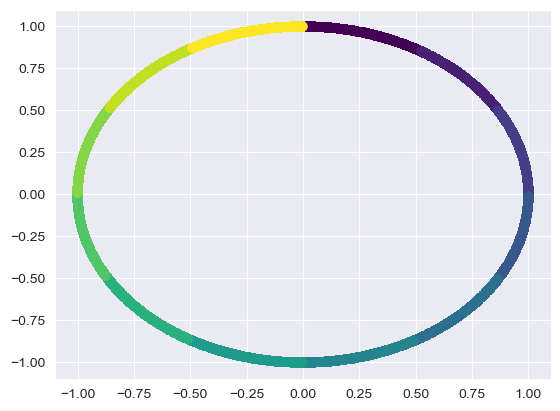

In [6]:
# scatter plot
import matplotlib.pyplot as plt
d = diarios[diarios.date.dt.year == 2020]
plt.scatter(d.sen_ano, d.cos_ano, c=d.date.dt.month, cmap='viridis')
# same with month
# d = d[diarios.date.dt.month == 1]
# plt.scatter(d.sen_mes, d.cos_mes, c=d.date.dt.day, cmap='viridis')

# Assumir independência entre concelhos

In [7]:

# transform to cumulative events
cum_diarios = diarios.copy()
cum_diarios.set_index(["concelho", 'date'], inplace=True)
cum_diarios.drop(["distrito"], axis=1, inplace=True)
eventos.set_index(["concelho", 'data_do_incidente'], inplace=True)
cum_diarios

t_med  t_max  t_min  dd_med  dd_ffx  ff_med  ff_max  \
concelho date                                                              
ALMADA   2018-01-01    8.8   17.8    2.7  273.50   292.5   1.700   6.725   
         2018-01-02   10.7   17.4    2.6  278.25   289.5   2.000   7.800   
         2018-01-03   14.7   17.5   10.2  291.25   320.5   2.050   6.200   
         2018-01-04   15.0   20.3   12.9  255.25   244.5   2.625   7.450   
         2018-01-05   12.8   15.7    9.5  245.25   194.0   3.575  11.200   
...                    ...    ...    ...     ...     ...     ...     ...   
RESENDE  2023-12-27    7.3   12.6    2.8  133.00    90.0   2.600   5.700   
         2023-12-28    8.8   10.7    7.2  202.00   208.0   2.300   5.500   
         2023-12-29    9.3   11.9    7.9  157.00   231.0   1.400   3.700   
         2023-12-30    9.0    9.7    7.6  191.00   219.0   2.600   8.300   
         2023-12-31    7.4   10.4    5.2  277.00   214.0   3.700  10.900   

                     pr_qtd  dd_med_sin  dd_med_cos  ...  percentagem_zonaa  \
concelho date                                        ...                      
ALMADA   2018-01-01     0.1   -0.180445   -0.983585  ...           0.569832   
         2018-01-02     0.0    0.976104   -0.217303  ...           0.569832   
         2018-01-03     0.0    0.794459   -0.607317  ...           0.569832   
         2018-01-04     0.4   -0.703986   -0.710213  ...           0.569832   
         2018-01-05    19.3    0.204324    0.978903  ...           0.569832   
...                     ...         ...         ...  ...                ...   
RESENDE  2023-12-27     0.2    0.868966    0.494872  ...           0.000000   
         2023-12-28     4.2    0.806418    0.591345  ...           0.000000   
         2023-12-29     5.9   -0.079549    0.996831  ...           0.000000   
         2023-12-30     3.6    0.594909   -0.803793  ...           0.000000   
         2023-12-31     4.5    0.514004    0.857788  ...           0.000000   

                     percentagem_zonab  percentagem_zonac  \
concelho date                                               
ALMADA   2018-01-01           0.351955           0.078212   
         2018-01-02           0.351955           0.078212   
         2018-01-03           0.351955           0.078212   
         2018-01-04           0.351955           0.078212   
         2018-01-05           0.351955           0.078212   
...                                ...                ...   
RESENDE  2023-12-27           0.000000           1.000000   
         2023-12-28           0.000000           1.000000   
         2023-12-29           0.000000           1.000000   
         2023-12-30           0.000000           1.000000   
         2023-12-31           0.000000           1.000000   

                     soma_degree_rede_concelho  n_subestacoes_concelho  \
concelho date                                                            
ALMADA   2018-01-01                       17.0                     7.0   
         2018-01-02                       17.0                     7.0   
         2018-01-03                       17.0                     7.0   
         2018-01-04                       17.0                     7.0   
         2018-01-05                       17.0                     7.0   
...                                        ...                     ...   
RESENDE  2023-12-27                        0.0                     0.0   
         2023-12-28                        0.0                     0.0   
         2023-12-29                        0.0                     0.0   
         2023-12-30                        0.0                     0.0   
         2023-12-31                        0.0                     0.0   

                     perc_prim  perc_sec  perc_terc  minheight  maxheight  
concelho date                                                              
ALMADA   2018-01-01   0.005225  0.136672   0.858103        0.0      125.0  
         2018-01-02

C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\3604150654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cum_lisboa["n_incidentes"] = 0
C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\3604150654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cum_lisboa["n_incidentes"] = cum_lisboa["n_incidentes"].cumsum()


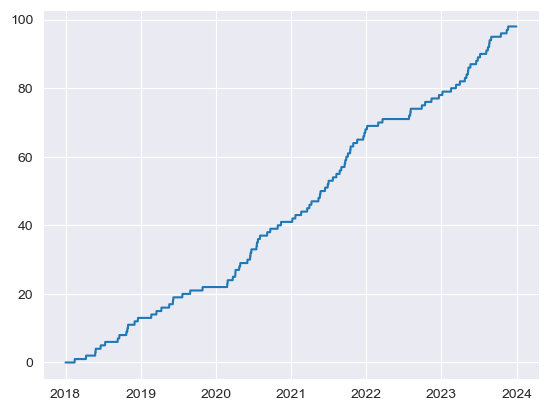

In [8]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# to exemplify pick up lisboa
cum_lisboa = cum_diarios.loc["LISBOA"]
cum_lisboa["n_incidentes"] = 0
for evento in eventos.loc["LISBOA"].index:
  cum_lisboa.loc[evento, "n_incidentes"] = 1
cum_lisboa["n_incidentes"] = cum_lisboa["n_incidentes"].cumsum()
# plot
plt.plot(cum_lisboa.index, cum_lisboa.n_incidentes)

C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Plancha\Desktop\pfacd\.pixi\envs\default\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


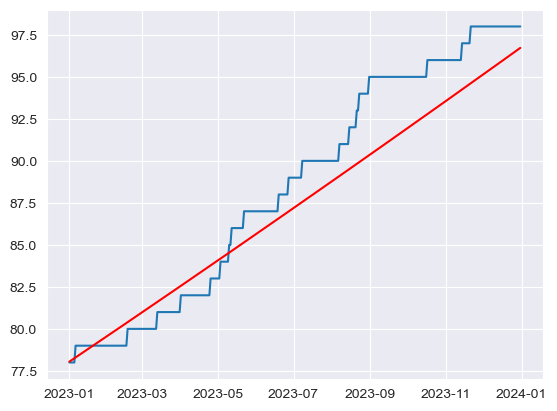

In [9]:
# split data
train = cum_lisboa[cum_lisboa.index.year < 2023]
test = cum_lisboa[cum_lisboa.index.year == 2023]

# fit model
model = AutoReg(train.n_incidentes, lags=1)
model_fit = model.fit()
# make prediction
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# plot
plt.plot(test.index, test.n_incidentes)
plt.plot(test.index, predictions, color='red')
plt.show()

C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\3510342706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["n_incidentes_predicted"] = predictions
C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\3510342706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["n_incidentes_predicted"] = test["n_incidentes_predicted"].apply(np.round)


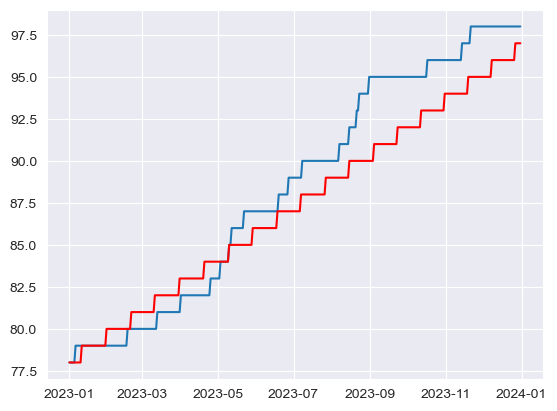

In [10]:
# decode into events
test["n_incidentes_predicted"] = predictions
# floor
test["n_incidentes_predicted"] = test["n_incidentes_predicted"].apply(np.round)
# plot
plt.plot(test.index, test.n_incidentes)
plt.plot(test.index, test.n_incidentes_predicted, color='red')
plt.show()

In [11]:
# transform into events
test["n_incidentes_predicted_diff"] = test["n_incidentes_predicted"].diff()
# write first so it isn't NaN
test["n_incidentes_predicted_diff"][0] = test["n_incidentes_predicted"][0] - train["n_incidentes"].iloc[-1]
# filter only those that are > 0
test_events = test[test["n_incidentes_predicted_diff"] > 0]
timespamps = list(test_events.index)
timespamps

C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\1103734926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["n_incidentes_predicted_diff"] = test["n_incidentes_predicted"].diff()
C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\1103734926.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test["n_incidentes_predicted_diff"][0] = test["n_incidentes_predicted"][0] - train["n_incidentes"].iloc[-1]
C:\Users\Plancha\AppData\Local\Temp\ipykernel_30704\1103734926.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are s

[Timestamp('2023-01-11 00:00:00'),
 Timestamp('2023-01-31 00:00:00'),
 Timestamp('2023-02-20 00:00:00'),
 Timestamp('2023-03-11 00:00:00'),
 Timestamp('2023-03-31 00:00:00'),
 Timestamp('2023-04-20 00:00:00'),
 Timestamp('2023-05-10 00:00:00'),
 Timestamp('2023-05-29 00:00:00'),
 Timestamp('2023-06-18 00:00:00'),
 Timestamp('2023-07-07 00:00:00'),
 Timestamp('2023-07-27 00:00:00'),
 Timestamp('2023-08-15 00:00:00'),
 Timestamp('2023-09-04 00:00:00'),
 Timestamp('2023-09-23 00:00:00'),
 Timestamp('2023-10-12 00:00:00'),
 Timestamp('2023-10-31 00:00:00'),
 Timestamp('2023-11-19 00:00:00'),
 Timestamp('2023-12-08 00:00:00'),
 Timestamp('2023-12-27 00:00:00')]

In [12]:
# evaulation: ligar events a events do concelho
from unidecode import unidecode
def transform_concelhos(x):
  return unidecode(x).upper().replace(' ', '-')
# TODO

# sliding box-model (r=1)

In [18]:
evento_lisboa = cum_lisboa.copy()
evento_lisboa.drop(["n_incidentes"], axis=1, inplace=True)
evento_lisboa["houve_incidente"] = 0
for evento in eventos.loc["LISBOA"].index:
  evento_lisboa.loc[evento, "houve_incidente"] = 1
evento_lisboa

,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd,dd_med_sin,dd_med_cos,...,percentagem_zonab,percentagem_zonac,soma_degree_rede_concelho,n_subestacoes_concelho,perc_prim,perc_sec,perc_terc,minheight,maxheight,houve_incidente
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,12.0,16.3,8.1,277.0,270.0,1.5,7.0,0.0,0.514004,0.857788,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
2018-01-02,13.0,15.9,9.1,269.0,309.0,1.8,6.9,0.0,-0.923447,0.383726,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
2018-01-03,14.5,17.0,12.9,284.0,309.0,2.1,6.0,0.1,0.951064,0.308994,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
2018-01-04,14.3,16.3,13.3,251.0,264.0,2.8,7.9,0.8,-0.321594,0.946878,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
2018-01-05,12.4,15.1,9.1,288.0,225.0,3.6,13.9,13.2,-0.855504,0.517796,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,7.7,9.6,5.7,64.0,84.0,3.7,7.2,0.0,0.920026,0.391857,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
2023-12-28,9.8,12.7,7.4,60.0,51.0,2.9,6.3,0.0,-0.304811,-0.952413,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0
2023-12-29,10.0,12.0,8.7,57.0,45.0,2.7,6.1,0.0,0.436165,0.899867,...,0.0,0.0,130.0,26.0,0.005131,0.089228,0.90564,0.0,228.0,0


In [23]:
sliding_window: list[tuple[tuple, bool]] = list()
r = 2
for i in range(len(evento_lisboa) - r):
  # get the timestamps of the window
  window = evento_lisboa.iloc[i:i+r]
  # check if there was an event anywhere
  houve_incidente = window["houve_incidente"].sum() > 0
  # add to the list
  sliding_window.append((window.index, houve_incidente))
sliding_window

[(DatetimeIndex(['2018-01-01', '2018-01-02'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-03', '2018-01-04'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-04', '2018-01-05'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-05', '2018-01-06'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-06', '2018-01-07'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-07', '2018-01-08'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-08', '2018-01-09'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-09', '2018-01-10'], dtype='datetime64[ns]', name='date', freq=None),
  False),
 (DatetimeIndex(['2018-01-10', '2018-01-11'], dtype='da

In [25]:
# predict probability of sliding window being one
from sklearn.linear_model import LogisticRegression

train, test = 

X = evento_lisboa.drop(["houve_incidente"], axis=1).drop_constant_columns()
y = evento_lisboa["houve_incidente"]

,t_med,t_max,t_min,dd_med,dd_ffx,ff_med,ff_max,pr_qtd,dd_med_sin,dd_med_cos,dd_ffx_sin,dd_ffx_cos,sen_ano,cos_ano,sen_mes,cos_mes
date,,,,,,,,,,,,,,,,
2018-01-01,12.0,16.3,8.1,277.0,270.0,1.5,7.0,0.0,0.514004,0.857788,-0.176046,0.984382,1.721336e-02,0.999852,2.012985e-01,0.979530
2018-01-02,13.0,15.9,9.1,269.0,309.0,1.8,6.9,0.0,-0.923447,0.383726,0.901801,0.432151,3.442161e-02,0.999407,3.943559e-01,0.918958
2018-01-03,14.5,17.0,12.9,284.0,309.0,2.1,6.0,0.1,0.951064,0.308994,0.901801,0.432151,5.161967e-02,0.998667,5.712682e-01,0.820763
2018-01-04,14.3,16.3,13.3,251.0,264.0,2.8,7.9,0.8,-0.321594,0.946878,0.106017,0.994364,6.880243e-02,0.997630,7.247928e-01,0.688967
2018-01-05,12.4,15.1,9.1,288.0,225.0,3.6,13.9,13.2,-0.855504,0.517796,-0.930095,0.367319,8.596480e-02,0.996298,8.486443e-01,0.528964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,7.7,9.6,5.7,64.0,84.0,3.7,7.2,0.0,0.920026,0.391857,0.733190,-0.680023,-6.880243e-02,0.997630,-7.247928e-01,0.688967
2023-12-28,9.8,12.7,7.4,60.0,51.0,2.9,6.3,0.0,-0.304811,-0.952413,0.670229,0.742154,-5.161967e-02,0.998667,-5.712682e-01,0.820763
2023-12-29,10.0,12.0,8.7,57.0,45.0,2.7,6.1,0.0,0.436165,0.899867,0.850904,0.525322,-3.442161e-02,0.999407,-3.943559e-01,0.918958
